# Handwritten Digit Classification with ANN

This notebook demonstrates the process of building an Artificial Neural Network (ANN) for classifying handwritten digits using the MNIST dataset. It includes data preprocessing, model training, evaluation, and visualization of predictions.

## Import Libraries

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt



## Load and Preprocess Data
### We will load the MNIST dataset, normalize the pixel values, and convert the labels to one-hot encoding.

In [49]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



## Build the ANN Model
### We will build a simple ANN model with two hidden layers and one output layer.



In [52]:
# Build the ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit)
])



## Compile the Model
### We will compile the model using the Adam optimizer and categorical cross-entropy loss function.



In [55]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



## Train the Model
### We will train the model on the training data and validate it using a portion of the training data.



In [58]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Print training and validation accuracy
print("\nTraining and Validation Accuracy:")
for epoch, acc in enumerate(history.history['accuracy']):
    val_acc = history.history['val_accuracy'][epoch]
    print(f"Epoch {epoch+1}: Training Accuracy = {acc:.4f}, Validation Accuracy = {val_acc:.4f}")



Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8577 - loss: 0.4700 - val_accuracy: 0.9597 - val_loss: 0.1424
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9638 - loss: 0.1220 - val_accuracy: 0.9677 - val_loss: 0.1101
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9765 - loss: 0.0776 - val_accuracy: 0.9708 - val_loss: 0.0969
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9829 - loss: 0.0563 - val_accuracy: 0.9721 - val_loss: 0.0926
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9864 - loss: 0.0421 - val_accuracy: 0.9678 - val_loss: 0.1088

Training and Validation Accuracy:
Epoch 1: Training Accuracy = 0.9190, Validation Accuracy = 0.9597
Epoch 2: Training Accuracy = 0.9660, Validation Accuracy = 0.9677
Epoch 3: Training Accuracy = 0.9754, Validation Accuracy = 0.9708
Epoch 4: Training Accuracy = 0.9815, Validation Accuracy = 0.9721
Epoch 5: Training Accuracy = 0.9854, Validation Accu

## Evaluate the Model
### We will evaluate the model on the test set to measure its performance.



In [61]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')




313/313 - 1s - 3ms/step - accuracy: 0.9722 - loss: 0.0919

Test accuracy: 0.9722


## Make Predictions
### We will use the model to make predictions on the test set and visualize some results.



In [64]:
# Make predictions
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Display Test Images with Predictions
### We will display a few test images along with their predicted and actual labels.


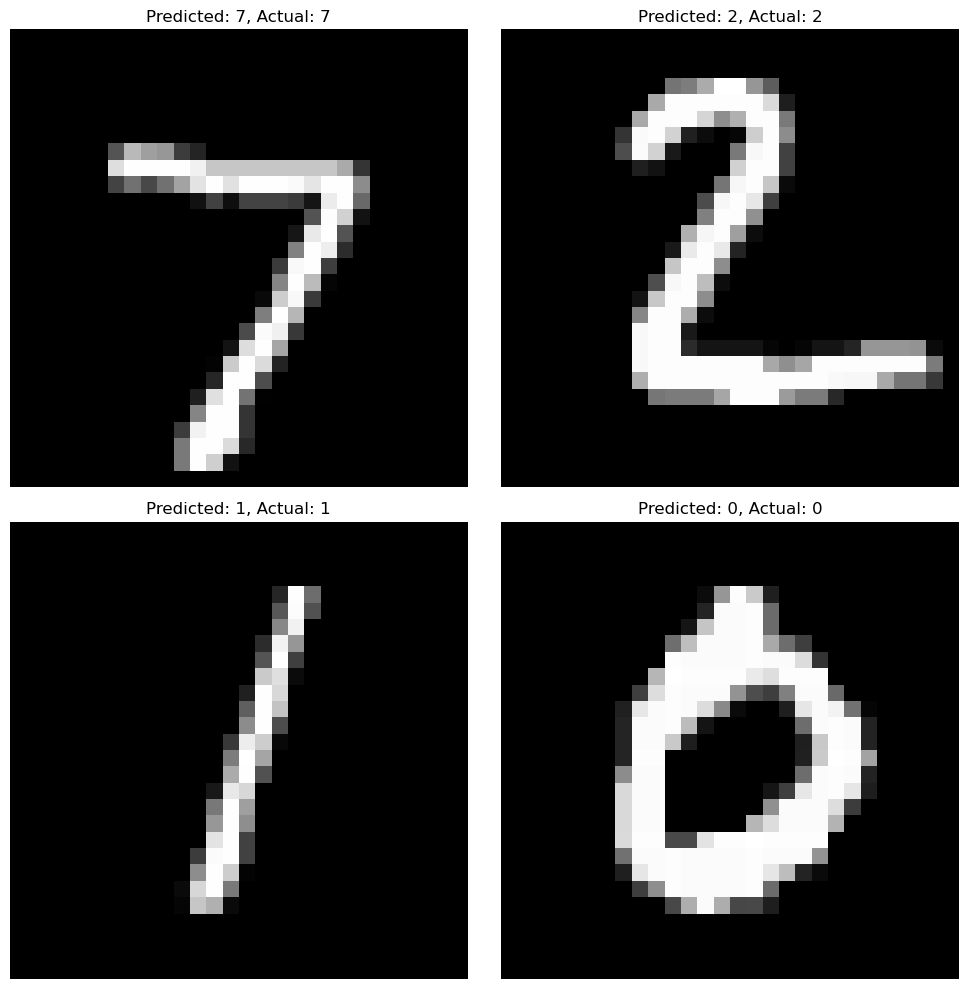

In [67]:

# Display multiple test images with their predictions and actual labels
num_images = 4
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(2, 2, i+1)
    plt.imshow(x_test[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(y_test[i])
    plt.title(f'Predicted: {predicted_label}, Actual: {actual_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()



## Explanation
aboveovided code demonstrates how to build, train, and evaluate a simple Artificial Neural Network (ANN) model using TensorFlow and Keras to classify handwritten digits from the MNIST dataset. Here's a step-by-step breakdown of the code:

1. **Import Libraries**:
   - `numpy` for numerical operations.
   - `tensorflow` and `keras` for building and training the neural network.
   - `matplotlib.pyplot` for visualizing results.

2. **Load MNIST Dataset**:
   - The MNIST dataset, which contains 28x28 grayscale images of handwritten digits (0-9), is loaded and split into training and testing sets.

3. **Preprocess Data**:
   - Pixel values of images are normalized to a range between 0 and 1.
   - Labels are converted to one-hot encoded vectors, where each label is represented as a vector with a `1` in the position of the corresponding digit and `0`s elsewhere.

4. **Build the ANN Model**:
   - A `Sequential` model is defined with three layers:
     - **Flatten Layer**: Converts the 28x28 2D images into 1D vectors.
     - **Dense Layer 1**: A fully connected layer with 128 neurons and ReLU activation function.
     - **Dense Layer 2**: Another fully connected layer with 64 neurons and ReLU activation function.
     - **Output Layer**: A fully connected layer with 10 neurons and a softmax activation function to output probabilities for each digit class.

5. **Compile the Model**:
   - The model is compiled using the Adam optimizer and categorical crossentropy loss function. Accuracy is used as a metric.

6. **Train the Model**:
   - The model is trained for 5 epochs with a batch size of 32. 20% of the training data is used for validation.

7. **Print Training and Validation Accuracy**:
   - After training, the accuracy for each epoch is printed, showing both training and validation accuracy.

8. **Evaluate the Model**:
   - The model's performance is evaluated on the test dataset, and the test accuracy is printed.

9. **Make Predictions**:
   - Predictions are made on the test dataset.

10. **Visualize Predictions**:
    - A subset of test images is displayed with their predicted and actual labels to visually assess the model's performance.

## Conclusion

In summary, this code showcases a straightforward approach to building and evaluating an ANN for digit classification using TensorFlow and Keras. The following key points are observed:

- **Model Architecture**: The network consists of a flatten layer followed by two dense layers and an output layer. This simple architecture is effective for the MNIST dataset, which is relatively straightforward.
- **Training and Evaluation**: The model is trained for 5 epochs with good results, as indicated by the accuracy metrics. The validation accuracy provides insight into how well the model generalizes to unseen data.
- **Visual Evaluation**: By displaying test images alongside their predicted and actual labels, we can visually inspect hownhance performance on more challenging datasets.

---